In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats


In [2]:
df_train =pd.read_excel("C:/Users/SOWNDARYA/Downloads/archive (54)/Data_Train.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df_train_copy =df_train.copy(deep=True)

In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df_train.duplicated().sum()

220

In [8]:
df_train.dropna(inplace=True)

In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df_train.drop_duplicates(inplace=True)

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_train.shape

(10462, 11)

# EDA

# 1 - Top Carriers by No of Flight :

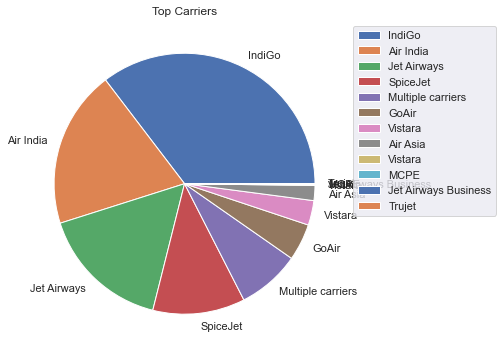

In [13]:
top_carriers = np.array(df_train['Airline'].value_counts(sort=True))

labels = ['IndiGo','Air India','Jet Airways','SpiceJet','Multiple carriers','GoAir','Vistara','Air Asia','Vistara','MCPE','Jet Airways Business','Trujet']

plt.figure(figsize=(8,6))
plt.pie(top_carriers, labels=labels,shadow=False)
plt.legend(labels=labels, 
           bbox_to_anchor=(1,1))
plt.title('Top Carriers')
plt.show()

conclusions :

Jet Airways Operates the Most no.of Flights,

Indigo, Air India, Jet Airways, SpiceJet operates major chunk of the flights.

# 2 - Histogram of Ticket Prices :

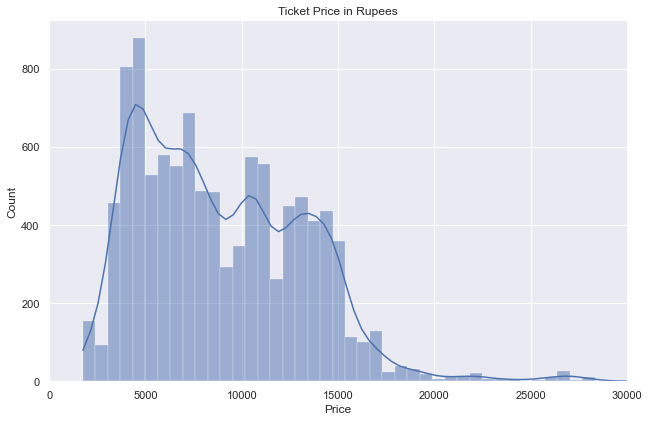

In [14]:
ticket_price = sns.displot(x=df_train['Price'], data=df_train, kde=True)
plt.title('Ticket Price in Rupees')
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(6)
ticket_price.set(xlim=(0, 30000))


conclusions :

Most of the Tickets are priced between 3000 - 15000,

There are few outliers ranging upto 25k.

From the chart it is clear that the Target Variable is Skewed

# 3 - Airports with Most no of Departure :

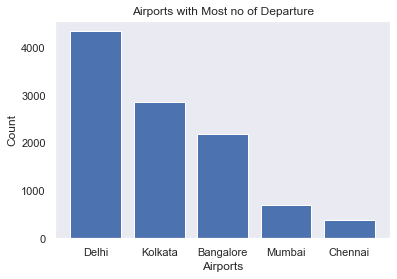

In [15]:

count = df_train['Source'].value_counts()
departure = np.array(['Delhi','Kolkata','Bangalore','Mumbai','Chennai'])

fig, ax = plt.subplots()

ax.bar(departure,count)
ax.set_title("Airports with Most no of Departure")
ax.set_xlabel("Airports")
ax.set_ylabel("Count")
ax.grid()
plt.show()

conclusions :

Delhi is the Busiest Airport with 4536 flights followed by Kolkata and Bangalore Airports.

# 4 - Frequent Destination :

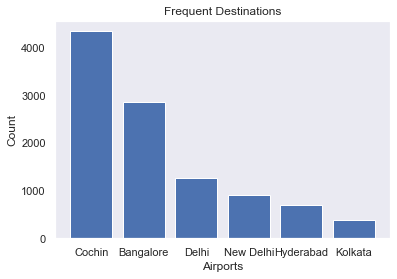

In [16]:
count1 = df_train.Destination.value_counts()
departure = np.array(['Cochin','Bangalore','Delhi','New Delhi','Hyderabad','Kolkata'])

fig, ax = plt.subplots()

ax.bar(departure,count1)
ax.set_title("Frequent Destinations")
ax.set_xlabel("Airports",)
ax.set_ylabel("Count")
ax.grid()
plt.show()

conclusions :

Delhi is the Busiest Airport with 4536 flights followed by Kolkata and Bangalore Airports.

# 5- Busiest Air Routes in the DataSet :

In [17]:
busy_routes = df_train['Route'].value_counts().reset_index().set_index('index')
busy_routes = busy_routes.head()
busy_routes

,Route
index,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621


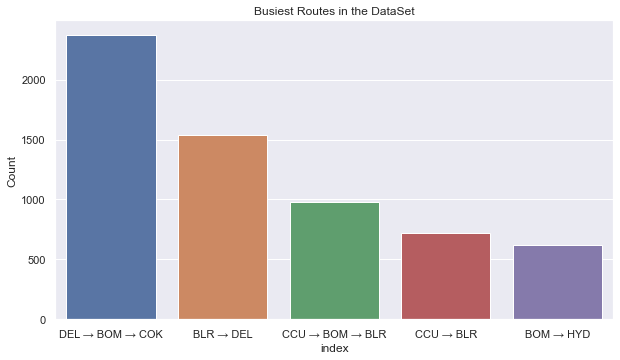

In [18]:
plt.figure(figsize=(10,5.5))
sns.barplot(x=busy_routes.index, y=busy_routes.Route)
plt.title('Busiest Routes in the DataSet')
plt.ylabel('Count')
plt.show()

# Feature Engineering

From data description we can see that Date_of_Journey is a object data type. therefore,we have to conver this datastype into timestamp as as to use this column properly for prediction.

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [19]:
df_train['Journey_day'] =pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.day

In [20]:
df_train['Journey_month'] =pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.month

In [21]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [23]:
df_train['Dep_hour'] =pd.to_datetime(df_train.Dep_Time).dt.hour

In [24]:
df_train['Dep_min'] =pd.to_datetime(df_train.Dep_Time).dt.minute

In [25]:
df_train.drop(['Dep_Time'],axis=1,inplace=True)

In [26]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [27]:
df_train['Arrival_hour'] =pd.to_datetime(df_train.Arrival_Time).dt.hour

In [28]:
df_train['Arrival_min'] =pd.to_datetime(df_train.Arrival_Time).dt.minute

In [29]:
df_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [30]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


We then convert the flight duration to hours and minutes by:

1.Ensure every entry has hr and min duration[i].split() split "15h 15m" into "15h", "15m" if its length is not 2, either h or min is omitted 2.split the data into two features(h and min)

In [31]:
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [32]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [33]:
df_train.drop(["Duration"], axis = 1, inplace = True)

In [34]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

Feature Transformation - Handling Categorical Data Nominal data --> data are not in any order --> OneHotEncoder

Ordinal data --> data are in order --> LabelEncoder

OneHotEncoder assign the column into multiple rows corresponding to the categories. It then assign 1 to the corresponding category and 0 to all other categories.

Airlines Airlines are not ordered (nominal). Therefore will we use OneHotEncoder. But if we include international flights which will be much more expensive in general, we can use label encoder instead to capture the correlation.

Let's see the distribution of each class:

In [35]:
df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

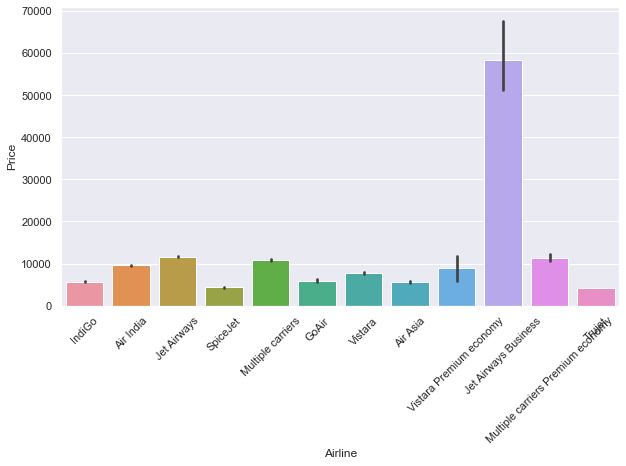

In [36]:
plt.figure(figsize=(10,5.5))
sns.barplot(x='Airline',y='Price',data=df_train)
plt.xticks(rotation=45)

Jet Airways Business have the highest Price.

In [37]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_train[['Airline']]

Airline =pd.get_dummies(Airline,drop_first =True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
df_train['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

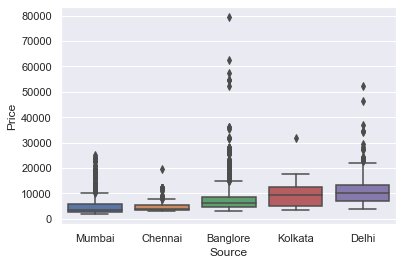

In [39]:
# Sources vs Price

sns.boxplot(x='Source',y ='Price',data=df_train.sort_values('Price'))

In [40]:
## AS source is Nominal categorical data we will perform OneHotEncoding
Source =df_train[['Source']]

Source = pd.get_dummies(Source,drop_first =True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [41]:
df_train['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [42]:
## AS Destination is Nominal Category data we will perform OneHotEncoding

Destination =df_train[['Destination']]
Destination =pd.get_dummies(Destination,drop_first =True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [43]:
df_train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10462, dtype: object

In [44]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [45]:
df1 = df_train.copy(deep=True)

In [46]:
## Additional_info contains almost 80% no_info
## Route and Total_Stops are related to each other

df_train.drop(['Route','Additional_Info'],axis=1,inplace=True)


In [47]:
##As this is case of Ordinal Categorical type we perform labelEncoder
## here values are assigned with coreesponding keys

df_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops': 4},inplace=True)

In [48]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [49]:
## Concatenate dataframe 

df1_train =pd.concat([df_train,Airline,Source,Destination],axis=1)

In [50]:
df1_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
df1_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [52]:
df1_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
df1_train.shape

(10462, 30)

# Feature selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature sellection mrthods.

1.heatmap

2.fearure_importances_

3.SelectKBest

In [54]:
 df1_train.shape

(10462, 30)

In [55]:
df1_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [56]:
X = df1_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()
      

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
y =df1_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable

If 2 features are highly correlated (eg. >80%), we can consider dropping one of them as they contain similar infomation

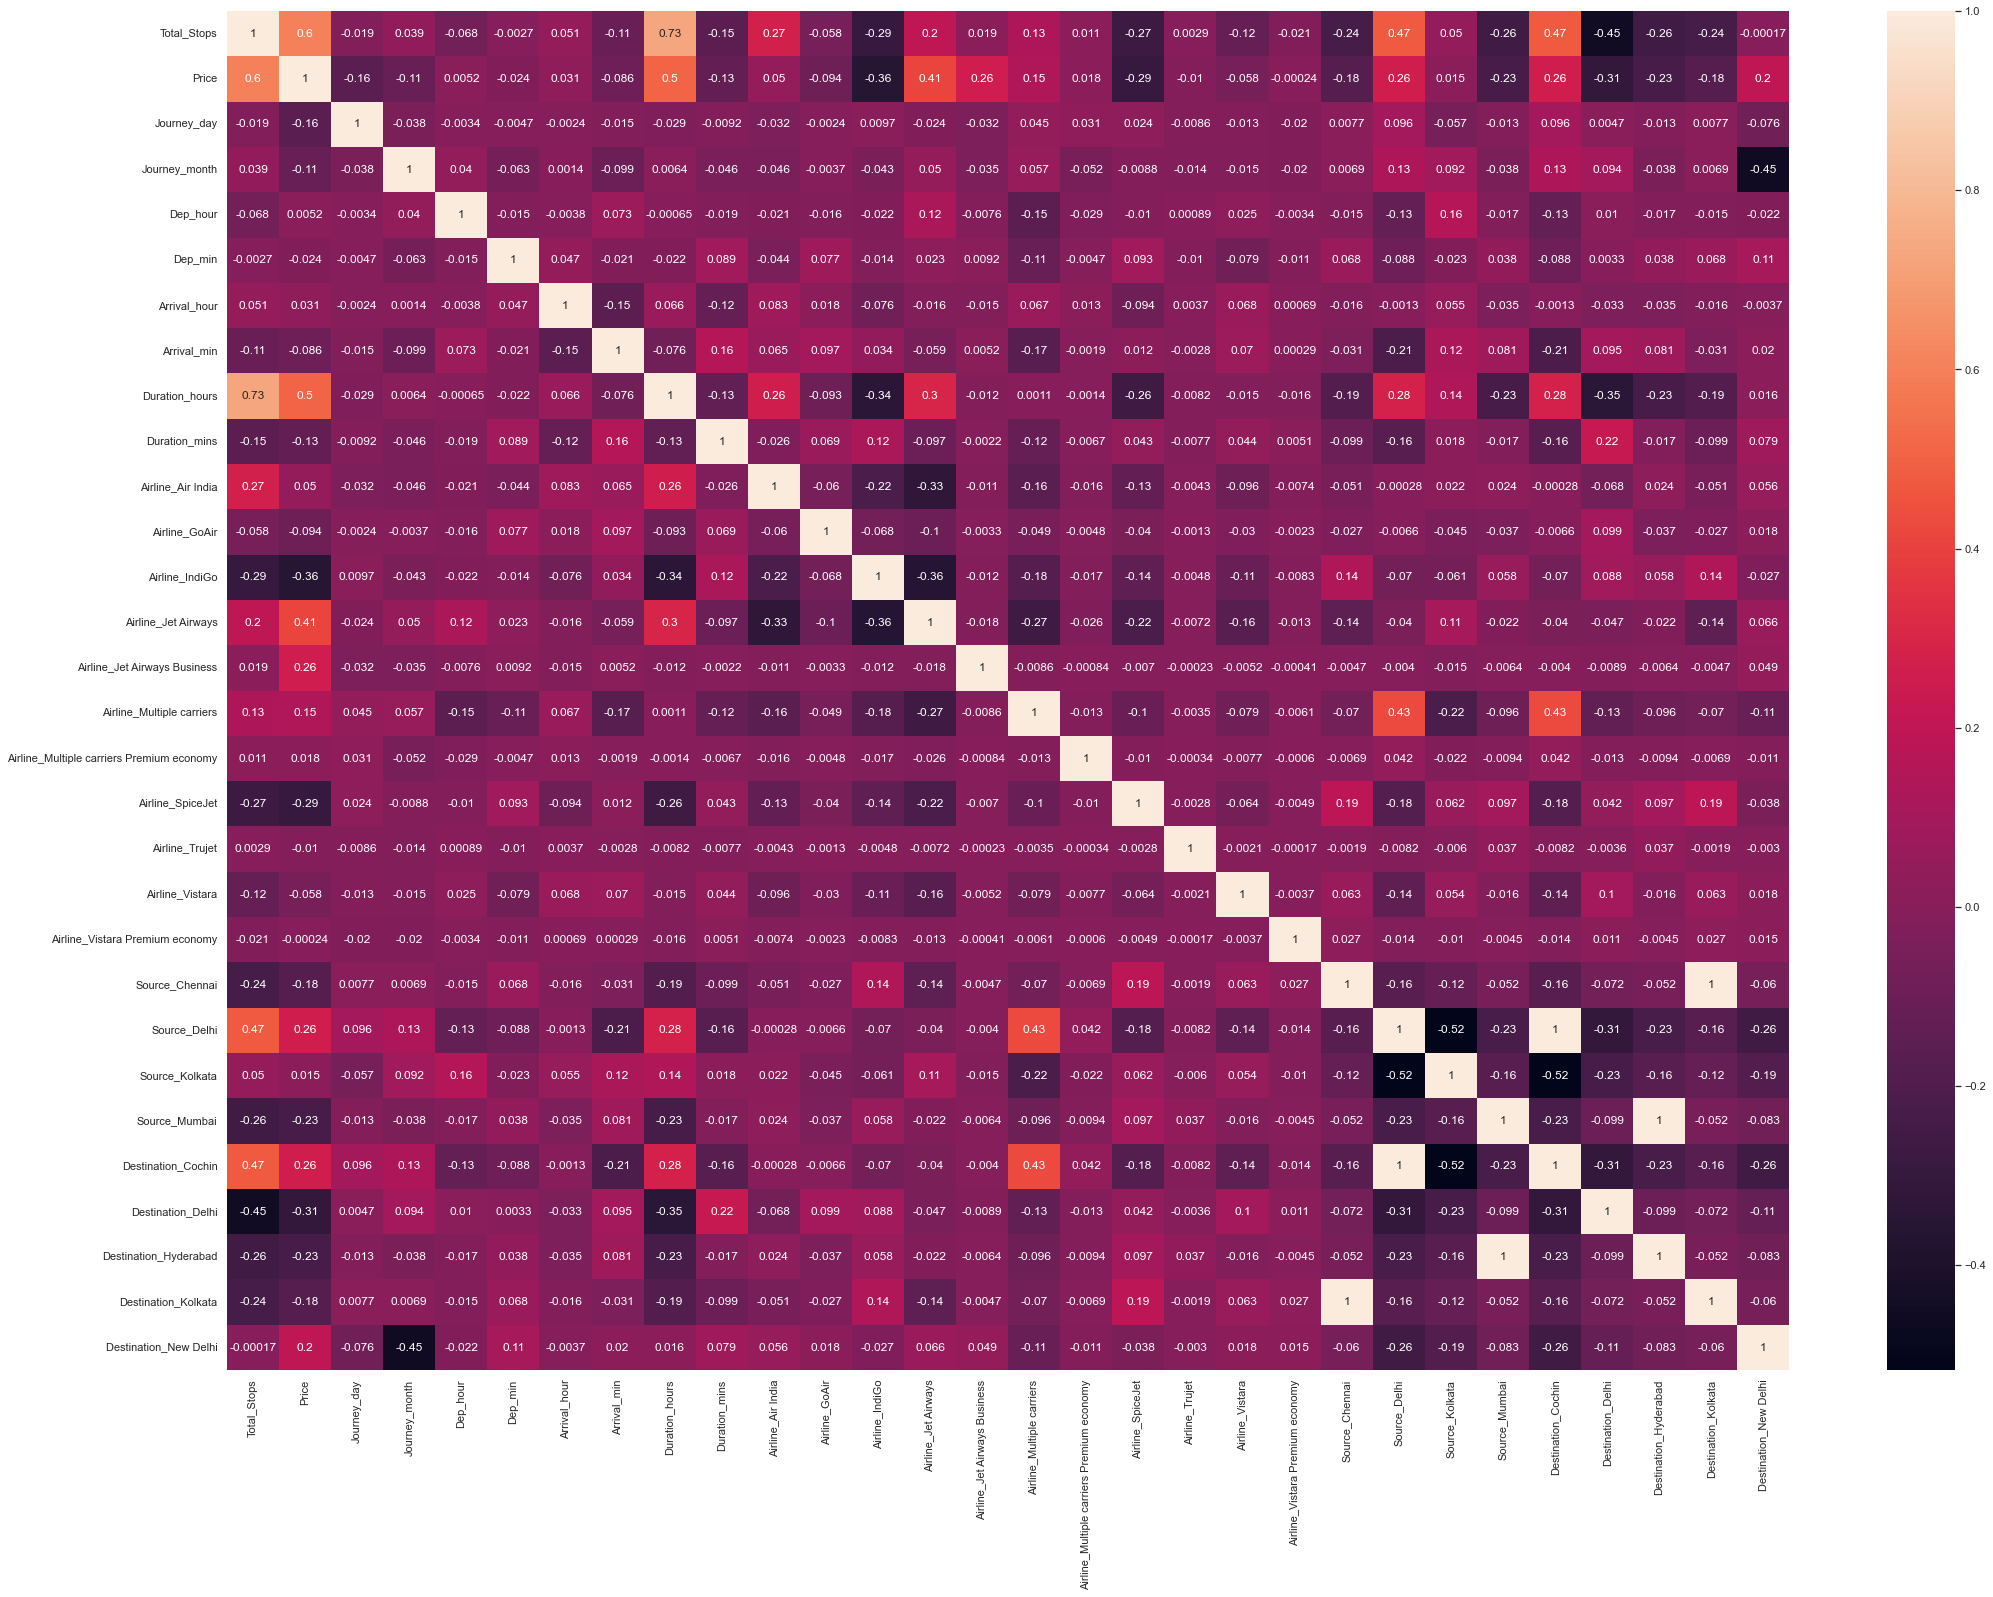

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

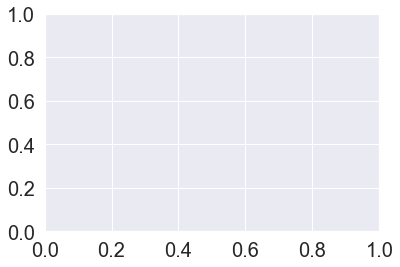

In [118]:
# find correlation between Independent and dependent attributes
plt.figure(figsize=(35,25))
sns.heatmap(df1_train.corr(),annot =True)
plt.show()

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Feature Importance with Extra Trees Regressor

we can get the feature importance of each feature of our dataset by using the feature importance property of the model. Feature importance gives you a score for each feature of our data, the higher the score more important or relevant is the feature towards your output variable.

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [60]:
print(selection.feature_importances_)

[2.24646178e-01 1.42486514e-01 5.50589496e-02 2.43596235e-02
 2.07230944e-02 2.88036942e-02 1.92248875e-02 1.14938168e-01
 1.73588044e-02 1.19088057e-02 1.87154637e-03 1.52241523e-02
 1.44051525e-01 6.80188531e-02 1.91587994e-02 9.21532722e-04
 2.99731838e-03 1.17862722e-04 5.41842819e-03 8.94801890e-05
 5.01903947e-04 9.69108377e-03 3.14938892e-03 7.25247537e-03
 1.33900242e-02 1.52213115e-02 7.29465560e-03 5.80441145e-04
 2.55404979e-02]


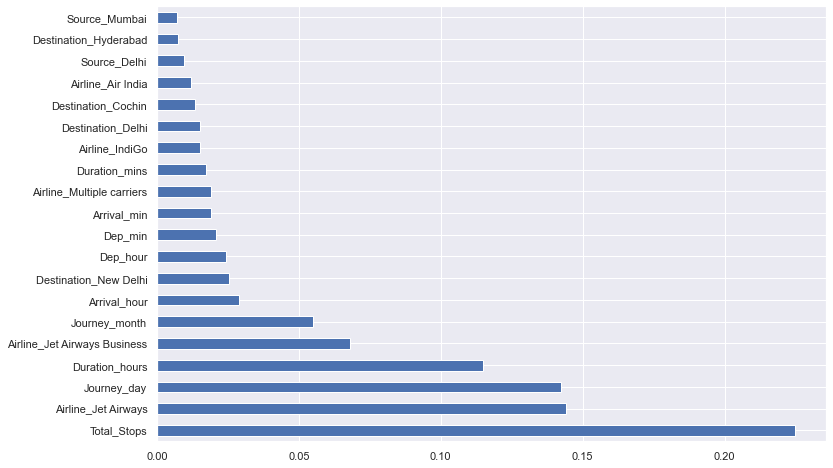

In [61]:
# plot graph of feature importances for better visulization

plt.figure(figsize=(12,8))
feat_importances =pd.Series(selection.feature_importances_,index =X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

It is obvious total stops is the most important feature, followed by journey day and duration hours.

# Check for Normality

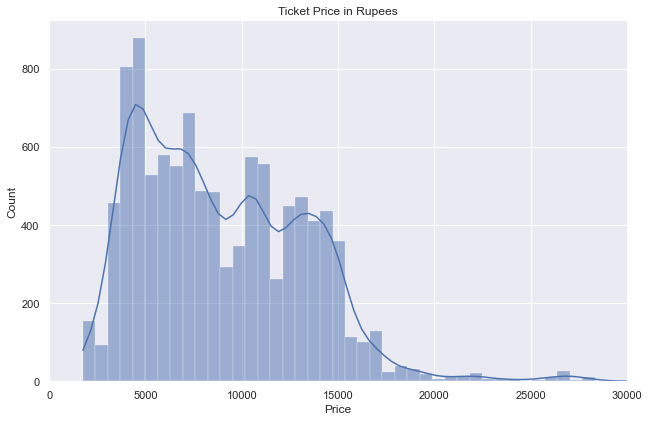

In [113]:
ticket_price = sns.displot(x=df1_train['Price'], data=df_train, kde=True)
plt.title('Ticket Price in Rupees')
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(6)
ticket_price.set(xlim=(0, 30000))


#We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights.

Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro-Wilk test is as follows:

Ho: The data is normally distributed

H1: The data is not normally distributed

In [116]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df1_train.Price)

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.892, p-value=0.000
The data is not normally distributed (reject H0)


# Treating skewness

In [119]:
# log transformation using np.log()
df1_train['log_Price'] = np.log(df1_train['Price'])

# display the top 5 rows of the data
df1_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,log_Price
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.267962
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8.944028
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9.538348
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8.735204
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.495670


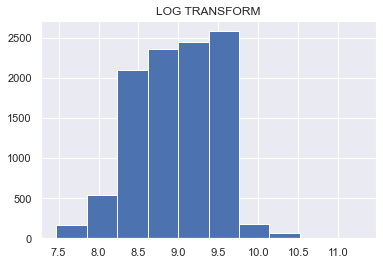

In [63]:
##log transformation

plt.hist(np.log(df1_train['Price']))
plt.title('LOG TRANSFORM')
plt.show()

	
It can be seen that the variable log_Price is near normally distributed. 

In [120]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df1_train['log_Price'])

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.980, p-value=0.000
The data is not normally distributed (reject H0)


In [121]:
# find the skewness of the variable log_Property_Sale_Price
df1_train['log_Price'].skew()

-0.2282796424039409

# scaling the data

In [128]:
sc =StandardScaler()
ds_x = df1_train.drop(['Price','log_Price'],axis=1)
y_log =df1_train['log_Price'] 
y =df1_train['Price']
scaled_x =sc.fit_transform(ds_x)

# splitting the dataset

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train_log,y_test_log =train_test_split(scaled_x,y_log,test_size=0.2,random_state =42)

# linear regression model with Log Trasformed Dependent Variable

In [133]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train,y_train_log)
y_pred_lr =lr.predict(X_test)
lr.score(X_train,y_train_log)

0.7283474794090083

In [134]:
lr.score(X_test,y_test_log)

0.7158240408461292

# Random Forest model

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(scaled_x,y,test_size=0.2,random_state =42)
from sklearn.ensemble import RandomForestRegressor
reg_rf =RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [136]:
y_pred_reg =reg_rf.predict(x_test)

In [137]:
reg_rf.score(x_train,y_train)

0.9529976996568924

In [138]:
reg_rf.score(x_test,y_test)

0.8132277448582556

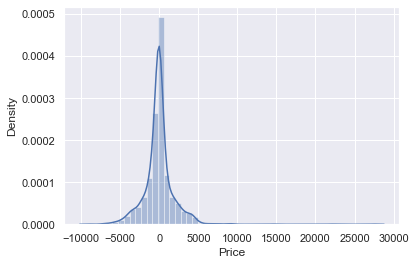

In [139]:
sns.distplot(y_test-y_pred_reg)
plt.show()

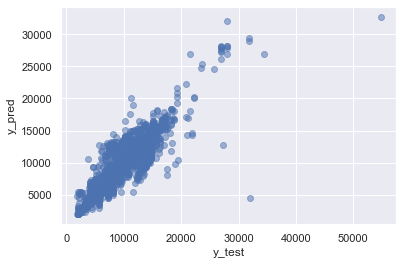

In [140]:
plt.scatter(y_test,y_pred_reg,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [73]:
from sklearn import metrics

In [141]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_reg))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_reg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_reg)))

MAE: 1175.392959031254
MSE: 3894253.1394305076
RMSE: 1973.3862114220083


In [142]:
metrics.r2_score(y_test,y_pred_reg)

0.8132277448582556

# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
#Randomized Search CV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# number of features to consider at every split
max_features=['auto','sqrt']
# maximun number of levels in tree
max_depth =[int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split =[2,5,10,15,100]
#minimum number of sample required at each leaf node
min_samples_leaf=[1,2,5,10]

In [78]:
# create the random grid

random_grid ={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [79]:
# random search of parameters,using 5 fold cross validation,
# search across 100 different combinations
rf_random =RandomizedSearchCV(estimator =reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [80]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [81]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [82]:
reg_tuned_pre = rf_random.predict(X_test)

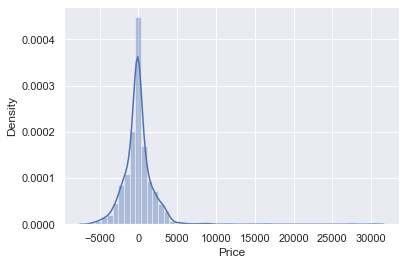

In [83]:
sns.distplot(y_test-reg_tuned_pre)
plt.show()

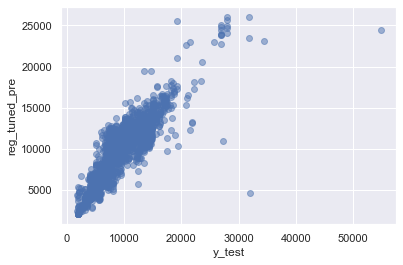

In [84]:
plt.scatter(y_test,reg_tuned_pre,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('reg_tuned_pre')
plt.show()

In [85]:
print('MAE:',metrics.mean_absolute_error(y_test,reg_tuned_pre))
print('MSE:',metrics.mean_squared_error(y_test,reg_tuned_pre))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,reg_tuned_pre)))

MAE: 1239.4798105027953
MSE: 3983958.0978512615
RMSE: 1995.9854954010216


In [86]:
metrics.r2_score(y_test,reg_tuned_pre)

0.8089254058007358

# xgboost regressor model

In [143]:
from xgboost import XGBRegressor 
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train, y_train)
y_pred_xgboost = xgboost_model.predict(x_test)
print(xgboost_model.score(x_train, y_train))

0.9346146612172604


In [144]:
print('XGBoost')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgboost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgboost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))

XGBoost
MAE: 1140.565122616217
MSE: 3359885.8002598677
RMSE: 1832.9991271846989


In [145]:
metrics.r2_score(y_test, y_pred_xgboost)

0.8388565341119478

# hyperparametertuning xgboost model

In [90]:
# Create the random grid for the XGBoost model

params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [91]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
xgb_model_tuned = RandomizedSearchCV(estimator = xgboost_model, param_distributions = params, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [92]:
xgb_model_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   1.2s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   1.2s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   1.2s
[CV] END colsample_bytree=0.7, gamm

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:
xgb_model_tuned.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [94]:
xgb_tuned_prediction =xgb_model_tuned.predict(X_test)

In [95]:
metrics.r2_score(y_test, y_pred_xgboost)

0.8389501752156404

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test,xgb_tuned_prediction ))
print('MSE:', metrics.mean_squared_error(y_test, xgb_tuned_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_tuned_prediction)))

MAE: 1130.9391977863338
MSE: 3429590.3470128765
RMSE: 1851.9153185318373


In [97]:
metrics.r2_score(y_test,xgb_tuned_prediction )

0.8355134346973585

# Adaboost regressor

In [146]:
from sklearn.ensemble import  AdaBoostRegressor
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(x_train, y_train)
y_pred_adaboost = adaboost_model.predict(x_test)
print(adaboost_model.score(x_train, y_train))

0.36181011745962566


In [147]:
metrics.r2_score(y_test, y_pred_adaboost)

0.26714510770111843

In [148]:
print('adaboost')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_adaboost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_adaboost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_adaboost)))

adaboost
MAE: 3203.161504439683
MSE: 15280227.049333634
RMSE: 3908.993099166796


# Catboostregressor model

In [149]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor()
catboost_model.fit(x_train, y_train)
y_pred_catboost = catboost_model.predict(x_test)
print(catboost_model.score(x_train, y_train))

Learning rate set to 0.057275
0:	learn: 4492.1809509	total: 4.85ms	remaining: 4.84s
1:	learn: 4338.0296835	total: 9.35ms	remaining: 4.67s
2:	learn: 4193.9334492	total: 13.9ms	remaining: 4.62s
3:	learn: 4083.2863296	total: 19.1ms	remaining: 4.77s
4:	learn: 3962.9662046	total: 24.5ms	remaining: 4.88s
5:	learn: 3852.5283295	total: 29.8ms	remaining: 4.94s
6:	learn: 3741.9503119	total: 35.3ms	remaining: 5.01s
7:	learn: 3641.8787743	total: 39.5ms	remaining: 4.9s
8:	learn: 3562.8831751	total: 44.1ms	remaining: 4.86s
9:	learn: 3495.1516294	total: 48.7ms	remaining: 4.82s
10:	learn: 3412.6633119	total: 52.8ms	remaining: 4.75s
11:	learn: 3344.3479630	total: 58.4ms	remaining: 4.81s
12:	learn: 3284.2877140	total: 62.7ms	remaining: 4.76s
13:	learn: 3215.9768791	total: 67.2ms	remaining: 4.73s
14:	learn: 3154.4176995	total: 71.7ms	remaining: 4.71s
15:	learn: 3110.6342946	total: 76.3ms	remaining: 4.69s
16:	learn: 3056.5429262	total: 80.8ms	remaining: 4.67s
17:	learn: 3004.1069112	total: 85.6ms	remainin

In [150]:
metrics.r2_score(y_test, y_pred_catboost)

0.8428221479664384

In [151]:
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_catboost))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_catboost))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_catboost)))

MAE: 1155.6590013144857
MSE: 3277201.6553856786
RMSE: 1810.3042991126322


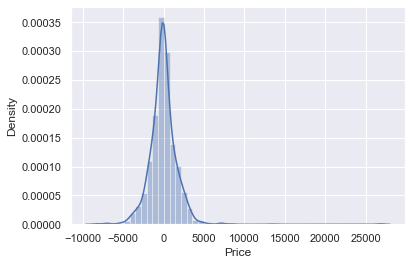

In [152]:
sns.distplot(y_test-y_pred_catboost)
plt.show()

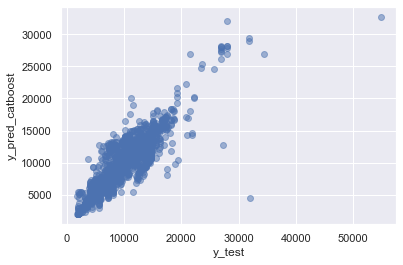

In [153]:
plt.scatter(y_test,y_pred_reg,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred_catboost')
plt.show()

In [106]:
# Catboost hyperparameter tuning

In [154]:
params ={'depth' :[6,8,10],
        'learning_rate' :[0.01,0.05,0.1],
        'iterations':[30,50,100]}

In [155]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
cat_model_tuned = RandomizedSearchCV(estimator =catboost_model , param_distributions = params, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [156]:
cat_model_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 4419.1722741	total: 4.43ms	remaining: 438ms
1:	learn: 4216.9010390	total: 7.53ms	remaining: 369ms
2:	learn: 4025.4939228	total: 11.5ms	remaining: 373ms
3:	learn: 3818.9576912	total: 15.7ms	remaining: 376ms
4:	learn: 3647.3138052	total: 19.7ms	remaining: 373ms
5:	learn: 3514.4698583	total: 22.9ms	remaining: 358ms
6:	learn: 3378.0469032	total: 26.8ms	remaining: 356ms
7:	learn: 3271.6580685	total: 31ms	remaining: 356ms
8:	learn: 3186.5070354	total: 35.1ms	remaining: 355ms
9:	learn: 3086.3236338	total: 38.8ms	remaining: 349ms
10:	learn: 2994.5814589	total: 43.1ms	remaining: 349ms
11:	learn: 2917.5286991	total: 47.1ms	remaining: 346ms
12:	learn: 2852.4988886	total: 51.3ms	remaining: 343ms
13:	learn: 2801.3147611	total: 55.6ms	remaining: 341ms
14:	learn: 2751.7458342	total: 59.9ms	remaining: 340ms
15:	learn: 2699.5913802	total: 63.9ms	remaining: 335ms
16:	learn: 2668.0551725	total: 67.3ms	remaining: 329ms
17:	learn: 2641.

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000023E9440C3D0>,
                   n_jobs=1,
                   param_distributions={'depth': [6, 8, 10],
                                        'iterations': [30, 50, 100],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, verbose=2)

In [157]:
cat_model_tuned.best_params_

{'learning_rate': 0.1, 'iterations': 100, 'depth': 8}

In [158]:
cat_tuned_prediction =cat_model_tuned.predict(x_test)

In [159]:
metrics.r2_score(y_test, cat_tuned_prediction)

0.8134896772343245

In [162]:
print('MAE:',metrics.mean_absolute_error(y_test, cat_tuned_prediction))
print('MSE:',metrics.mean_squared_error(y_test,cat_tuned_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,cat_tuned_prediction)))

MAE: 1325.1615459406585
MSE: 3888791.776997148
RMSE: 1972.0019718542749


Here i build a models on Linear Regression,Randomforest Regressor,Hyperparametertuning Randomforest Regressor,Adaboost regressor,
Xgboost regressor,Hyperparametertuning Xgboost regressor,Catboost regressor,Hyperparamtertuning Catboost regressor.

from the above model i got maximum r2_score 84.28% for Catboost Regressor model with minimal Rmse of 1810.